# **Objetivo general**

El objetivo de este proyecto es crear una aplicación para analizar las características de todos los exoplanetas descubiertos.

# **Objetivos específicos**

1.      Implementar algoritmos para construir y recorrer matrices.

2.      Utilizar las librerías pandas y matplotlib, así como consultar los sitios web oficiales donde se encuentra toda la documentación.

3.      Descomponer un problema en subproblemas e implementar las funciones que los resuelven.

# **Descripción**

En este proyecto se trabaja con los datos de todos los planetas extrasolares confirmados (llamados exoplanetas), descubiertos entre 1988 y 2018 (más de 3000). Esta información se encuentra recopilada en la base de datos llamada Open Exoplanet Catalogue (https://www.kaggle.com/mrisdal/open-exoplanet-catalogue). En el archivo “exoplanetas.csv” se encuentra una versión simplificada de los datos originales. Se suprimen de este catálogo los planetas que no han sido confirmados, se eliminan algunas columnas y se modifican las clasificaciones de valores numéricos por valores categóricos.   

Los campos de los datos incluyen atributos de estrellas y de planetas, métodos de descubrimiento y por supuesto, la fecha de los descubrimientos.


*(Texto extraído y modificado del curso 'Programación en Python' de la Universidad de los Andes)*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import numpy as np

plt.rcParams.update({'font.size': 12})

def cargar_datos(nombre_archivo:str)->pd.DataFrame:
    """ Carga los datos de un archivo csv y retorna el DataFrame con la informacion.
    Parametros:
        nombre_archivo (str): El nombre del archivo CSV que se debe cargar
    Retorno:
        (DataFrame) : El DataFrame con todos los datos contenidos en el archivo
    """
    nombre_archivo=pd.read_csv('exoplanetas.csv')
    
    return nombre_archivo

def histograma_descubrimiento(datos:pd.DataFrame)->None:
    """ Calcula y despliega un histograma con 30 grupos (bins) en el que debe
        aparecer la cantidad de planetas descubiertos por anho.
    Parametros:
        datos (DataFrame): el DataFrame con la informacion de los exoplanetas
    """

    planetas=datos["DESCUBRIMIENTO"]
    des=planetas.plot(kind="hist", figsize=(10,4), bins=30, ylim=(0,1400), 
                      title="Cantidad de planetas descubiertos entre 1988 y 2018")
    des.set_xlabel("Años")  
    des.set_ylabel("Cantidad de planetas descubiertos")
    
    return des

def estado_publicacion_por_descubrimiento(datos:pd.DataFrame)->None:
    """ Calcula y despliega un BoxPlot donde aparecen la cantidad de planetas
        descubiertos por anho, agrupados de acuerdo con el tipo de publicacion.
    Parametros:
        datos (DataFrame): el DataFrame con la informacion de los exoplanetas
    """
    
    datos[["ESTADO_PUBLICACION","DESCUBRIMIENTO"]].boxplot(by="ESTADO_PUBLICACION",
                                                                    rot=90,figsize=(8,8))
    plt.title("Tipo de publicación vs año de descubrimiento")  
    plt.xlabel("Año de descubrimiento")  
    plt.ylabel("Tipo de publicación")    

def deteccion_por_descubrimiento(datos:pd.DataFrame)->None:
    """ Calcula y despliega un BoxPlot donde aparecen la cantidad de planetas
        descubiertos por anho, agrupados de acuerdo con el tipo de deteccion
    Parametros:
        datos (DataFrame): el DataFrame con la informacion de los exoplanetas
    """
    datos[["TIPO_DETECCION","DESCUBRIMIENTO"]].boxplot(by="TIPO_DETECCION",
                                                                    rot=90,figsize=(8,8))
    plt.title("Tipo de detección vs año de descubrimiento")  
    plt.xlabel("Año de descubrimiento")  
    plt.ylabel("Tipo de detección")  

def deteccion_y_descubrimiento(datos:pd.DataFrame,anho:int)->None:
    """ Calcula y despliega un diagrama de pie donde aparecen la cantidad de
        planetas descubiertos en un anho particular, clasificados de acuerdo
        con el tipo de publicacion.
        Si el anho es 0, se muestra la información para todos los planetas.
    Parametros:
        datos (DataFrame): el DataFrame con la informacion de los exoplanetas
        anho (int): el anho para el que se quieren analizar los planetas descubiertos
                    o 0 para indicar que deben ser todos los planetas.
    """
    por_tipo=datos.groupby("TIPO_DETECCION")
    por_anio=por_tipo["DESCUBRIMIENTO"].count()

    if anho==0:
        por_anio.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%')
        plt.title("Tipo de detección en todos los años")
        plt.ylabel("") 
    else:
        anio=datos[datos["DESCUBRIMIENTO"]==anho]
        grupo=anio[["DESCUBRIMIENTO","TIPO_DETECCION"]].groupby(["TIPO_DETECCION"]).count()
        grupo.plot.pie(y='DESCUBRIMIENTO', figsize=(8,8), autopct='%1.1f%%')
        plt.title("Tipo de detección en el año "+str(anho))
        plt.ylabel("")  
    

def cantidad_y_tipo_deteccion(datos:pd.DataFrame)->None:
    """ Calcula y despliega un diagrama de lineas donde aparece una linea por
        cada tipo de deteccion y se muestra la cantidad de planetas descubiertos
        en cada anho, para ese tipo de deteccion.
    Parametros:
        datos (DataFrame): el DataFrame con la informacion de los exoplanetas
    """
    por_tipo=datos.groupby("TIPO_DETECCION")
    por_anio=[]
    for j in por_tipo["DESCUBRIMIENTO"]:
        por_anio.append(j)
    
    diccionario={}
    
    for tipo in range(len(por_anio)):
        anio=[]
        cantidad=[]
        dic={}
        for j in (por_anio[tipo][1]):
            if j in dic:
                dic[j]+=1
            if j not in dic:
                dic[j]=1
        for j in dic:
            anio.append(j)
        for j in dic.values():
            cantidad.append(j)
        serie=pd.Series(cantidad,index=anio)
        diccionario[por_anio[tipo][0]]=serie
   
    nuevo=pd.DataFrame(diccionario)
    nuevo.plot(figsize=(10,6))
    plt.title("Cantidad de planetas descubiertos según el tipo de detención")  
    plt.xlabel("Año de descubrimiento")  
    plt.ylabel("Cantidad de planetas")  

def masa_promedio_y_tipo_deteccion(datos:pd.DataFrame)->None:
    """ Calcula y despliega un diagrama de lineas donde aparece una linea por
        cada tipo de detección y se muestra la masa promedio de los planetas descubiertos
        en cada anho, para ese tipo de deteccion.
    Parametros:
        datos (DataFrame): el DataFrame con la informacion de los exoplanetas
    """
    df_base=datos[["TIPO_DETECCION", "MASA", "DESCUBRIMIENTO"]].groupby("TIPO_DETECCION")
    lista=[]
    for j in df_base:
        lista.append(j)
    
    diccionario={}
    for tipo in range(len(lista)):
        anio=[]
        cantidad=[]
        dic={}
        dic_2={}
        contador=0
        for j in (lista[tipo][1]["DESCUBRIMIENTO"]):            
            if j in dic:
                dic[j]+=lista[tipo][1]["MASA"].iloc[contador]
                dic_2[j]+=1                
            if j not in dic:
                dic[j]=lista[tipo][1]["MASA"].iloc[contador]
                dic_2[j]=1
            contador+=1
        for j in dic:
            anio.append(j)
        contador=0
        for j in dic.values():            
            cantidad.append(j/dic_2.get(anio[contador]))
            contador+=1
        serie=pd.Series(cantidad,index=anio)
        diccionario[lista[tipo][0]]=serie

    nuevo=pd.DataFrame(diccionario)
    nuevo.plot(figsize=(10,6))
    plt.title("Masa promedio de los planetas según el tipo de detención")  
    plt.xlabel("Año de descubrimiento")  
    plt.ylabel("Masa promedio")

def masa_planetas_vs_masa_estrellas(datos: pd.DataFrame)->None:
    """ Calcula y despliega un diagrama de dispersión donde en el eje x se
        encuentra la masa de los planetas y en el eje y se encuentra el logaritmo
        de la masa de las estrellas. Cada punto en el diagrama correspondera
        a un planeta y estara ubicado de acuerdo con su masa y la masa de la
        estrella más cercana.
    Parametros:
        datos (DataFrame): el DataFrame con la informacion de los exoplanetas
    """
    df_base=datos[["MASA","MASA_ESTRELLA"]]
    des=df_base.plot(kind="scatter", x="MASA", y="MASA_ESTRELLA", figsize=(10,6), 
                     logy=True, title="Masa de los planetas vs. masa de la estrella más cercana")
    des.set_xlabel("Masa del planeta")  
    des.set_ylabel("Masa de la estrella (log)")

def graficar_cielo(datos:pd.DataFrame)->list:
    """ Calcula y despliega una imagen donde aparece un pixel por cada planeta,
        usando colores diferentes que dependen del tipo de detección utilizado
        para descubirlo.
    Parametros:
        datos (DataFrame): el DataFrame con la informacion de los exoplanetas
    Retorno:
        Una matriz de pixeles con la representacion del cielo
    """
    matriz=[]
    for j in range(0,100):
        a=[(0,0,0)]*201
        matriz.append(a)
    
    df_base=datos[["RA","DEC", "TIPO_DETECCION"]]   
    for j in range(len(df_base["RA"])):
        f=round(abs(99-abs(np.sin(df_base.loc[j, "RA"])*np.cos(df_base.loc[j, "DEC"])*100)))
        c=round(abs((np.cos(df_base.loc[j, "RA"])*np.cos(df_base.loc[j, "DEC"])*100)+100))
        if df_base.loc[j, "TIPO_DETECCION"] == "Microlensing":
            matriz[f][c]=[0.94,0.10,0.10]
        elif df_base.loc[j, "TIPO_DETECCION"] == "Radial Velocity":
            matriz[f][c]=[0.1,0.5,0.94]          
        elif df_base.loc[j, "TIPO_DETECCION"] == "Imaging":
            matriz[f][c]=[0.34,0.94,0.10]                             
        elif df_base.loc[j, "TIPO_DETECCION"] == "Primary Transit":
            matriz[f][c]=[0.10,0.94,0.85]       
        elif df_base.loc[j, "TIPO_DETECCION"] == "Other":
            matriz[f][c]=[0.94,0.10,0.85]
        elif df_base.loc[j, "TIPO_DETECCION"] == "Astrometry":
            matriz[f][c]=[0.94,0.65,0.10]         
        elif df_base.loc[j, "TIPO_DETECCION"] == "TTV":
            matriz[f][c]=[1.0,1.0,1.0]
    
    plt.imshow(matriz) 

def filtrar_imagen_cielo(imagen:list)->None:
    """ Le aplica a la imagen un filtro de convolucion basado en la matriz
        [[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]
    Parametros:
        imagen (list): una matriz con la imagen del cielo
    """
    datos=pd.read_csv('exoplanetas.csv')
    
    imagen=[]
    for j in range(0,100):
        a=[(0,0,0)]*201
        imagen.append(a)
        
    matriz=[]
    for j in range(0,100):
        a=[(0,0,0)]*201
        matriz.append(a)    
    
    df_base=datos[["RA","DEC", "TIPO_DETECCION"]]   
    for j in range(len(df_base["RA"])):
        f=round(abs(99-abs(np.sin(df_base.loc[j, "RA"])*np.cos(df_base.loc[j, "DEC"])*100)))
        c=round(abs((np.cos(df_base.loc[j, "RA"])*np.cos(df_base.loc[j, "DEC"])*100)+100))
        if df_base.loc[j, "TIPO_DETECCION"] == "Microlensing":
            imagen[f][c]=[0.94,0.10,0.10]
            matriz[f][c]=[0.94,0.10,0.10]
        elif df_base.loc[j, "TIPO_DETECCION"] == "Radial Velocity":
            imagen[f][c]=[0.1,0.5,0.94]   
            matriz[f][c]=[0.1,0.5,0.94] 
        elif df_base.loc[j, "TIPO_DETECCION"] == "Imaging":
            imagen[f][c]=[0.34,0.94,0.10]   
            matriz[f][c]=[0.34,0.94,0.10]                          
        elif df_base.loc[j, "TIPO_DETECCION"] == "Primary Transit":
            imagen[f][c]=[0.10,0.94,0.85]  
            matriz[f][c]=[0.10,0.94,0.85]
        elif df_base.loc[j, "TIPO_DETECCION"] == "Other":
            imagen[f][c]=[0.94,0.10,0.85]
            matriz[f][c]=[0.94,0.10,0.85]
        elif df_base.loc[j, "TIPO_DETECCION"] == "Astrometry":
            imagen[f][c]=[0.94,0.65,0.10] 
            matriz[f][c]=[0.94,0.65,0.10] 
        elif df_base.loc[j, "TIPO_DETECCION"] == "TTV":
            imagen[f][c]=[1.0,1.0,1.0]
            matriz[f][c]=[1.0,1.0,1.0]

    alto=len(imagen)
    ancho=len(imagen[0])
    mascara=[[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]
    
    for i in range(alto):
        for j in range(ancho):
            suma_colores=[0.0,0.0,0.0]
            suma_coef_mascara=0.0
            x=0
            for fila in range(i-1,i+2):
                y=0
                for columna in range(j-1,j+2):
                    if fila>=0 and fila<alto and columna>=0 and columna<ancho:
                        suma_colores[0]+=(mascara[x][y]*imagen[fila][columna][0])
                        suma_colores[1]+=(mascara[x][y]*imagen[fila][columna][1])
                        suma_colores[2]+=(mascara[x][y]*imagen[fila][columna][2])
                        suma_coef_mascara+=mascara[x][y]
                    y+=1
                x+=1
            if suma_coef_mascara!=0:
                nuevo_r=suma_colores[0]/suma_coef_mascara
                nuevo_g=suma_colores[1]/suma_coef_mascara
                nuevo_b=suma_colores[2]/suma_coef_mascara
            else:
                nuevo_r=suma_colores[0]
                nuevo_g=suma_colores[1]
                nuevo_b=suma_colores[2]               
    
            nuevo_pixel=(nuevo_r, nuevo_g, nuevo_b)
            matriz[i][j]=nuevo_pixel
    
    plt.imshow(matriz)



OPCIONES
0. Cargar datos
1. Numero de descubrimientos por anho (histograma)
2. Descubrimiento por estado de publicacion (boxplot)
3. Descubrimiento por tipo de deteccion (boxplot)
4. Tipo de deteccion por anho (pie)
5. Cantidad de descubrimientos por anho según el tipo de deteccion (lineas)
6. Masa promedio por anho y por tipo de deteccion (lineas)
7. Masa de los planetas vs. masa de la estrella mas cercana
8. Graficar cielo
9. Afinar la imagen del cielo
10. Salir
Seleccione una opcion del menu: 0
Ingrese el nombre del archivo que desea cargar: exoplanetas
Un archivo con 3732 registros fue cargado.
Las columnas del conjunto de datos son: 
 - NOMBRE
 - MASA
 - DESCUBRIMIENTO
 - ACTUALIZACION
 - ESTADO_PUBLICACION
 - TIPO_DETECCION
 - RA
 - DEC
 - DISTANCIA_ESTRELLA
 - MASA_ESTRELLA


OPCIONES
0. Cargar datos
1. Numero de descubrimientos por anho (histograma)
2. Descubrimiento por estado de publicacion (boxplot)
3. Descubrimiento por tipo de deteccion (boxplot)
4. Tipo de deteccion por



OPCIONES
0. Cargar datos
1. Numero de descubrimientos por anho (histograma)
2. Descubrimiento por estado de publicacion (boxplot)
3. Descubrimiento por tipo de deteccion (boxplot)
4. Tipo de deteccion por anho (pie)
5. Cantidad de descubrimientos por anho según el tipo de deteccion (lineas)
6. Masa promedio por anho y por tipo de deteccion (lineas)
7. Masa de los planetas vs. masa de la estrella mas cercana
8. Graficar cielo
9. Afinar la imagen del cielo
10. Salir
Seleccione una opcion del menu: 10


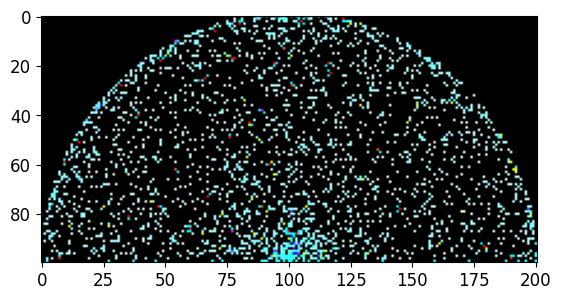

In [10]:
#import exoplanetas as mod
import pandas as pd

def ejecutar_cargar_datos() -> pd.DataFrame:
    """
       Pide el nombre del archivo CSV que se quiere cargar y usa la funcion
       cargar_datos para construir el DataFrame.
       Retorno:
           Un DataFrame con los datos contenidos en el archivo.
    """
    nombre_archivo=input("Ingrese el nombre del archivo que desea cargar: ")
    datos=cargar_datos(nombre_archivo)
    cantidad = len(datos)
    columnas = "\n - ".join(datos.columns)
    print(f"Un archivo con {cantidad} registros fue cargado.")
    print(f"Las columnas del conjunto de datos son: \n - {columnas}")
    return datos

def ejecutar_histograma_descubrimientos (datos:pd.DataFrame)->None:
    histograma_descubrimiento(datos)
       
def ejecutar_estado_publicacion_por_descubrimiento(datos:pd.DataFrame)->None:
    estado_publicacion_por_descubrimiento(datos)

def ejecutar_deteccion_por_descubrimiento(datos:pd.DataFrame)->None:
    deteccion_por_descubrimiento(datos)

def ejecutar_deteccion_y_descubrimiento(datos:pd.DataFrame)->None:
    num = int(input("Ingrese el anho que quiere visualizar. Para visualizar todos los anhos ingrese 0: "))
    deteccion_y_descubrimiento(datos,num)

def ejecutar_cantidad_y_tipo_deteccion(datos:pd.DataFrame)->None:
    cantidad_y_tipo_deteccion(datos)

def ejecutar_masa_promedio_y_tipo_deteccion(datos:pd.DataFrame)->None:
    masa_promedio_y_tipo_deteccion(datos)

def ejecutar_masa_planetas_vs_masa_estrellas(datos:pd.DataFrame)->None:
    masa_planetas_vs_masa_estrellas(datos)

def ejecutar_graficar_cielo(datos:pd.DataFrame)->None:
    graficar_cielo(datos)

def ejecutar_filtrar_imagen_cielo(datos:pd.DataFrame)->None:
    imagen = graficar_cielo(datos)
    filtrar_imagen_cielo(imagen)

def menu()->None:
    print("\n\nOPCIONES")
    print("0. Cargar datos")
    print("1. Numero de descubrimientos por anho (histograma)")
    print("2. Descubrimiento por estado de publicacion (boxplot)")
    print("3. Descubrimiento por tipo de deteccion (boxplot)")
    print("4. Tipo de deteccion por anho (pie)")
    print("5. Cantidad de descubrimientos por anho según el tipo de deteccion (lineas)")
    print("6. Masa promedio por anho y por tipo de deteccion (lineas)")
    print("7. Masa de los planetas vs. masa de la estrella mas cercana")
    print("8. Graficar cielo")
    print("9. Afinar la imagen del cielo")
    print("10. Salir")

def iniciar_aplicacion()->None:
    continuar=True
    while continuar:
        menu()
        elegido=int(input("Seleccione una opcion del menu: "))
        if elegido==0:
            datos=ejecutar_cargar_datos()
        elif elegido==1:
            ejecutar_histograma_descubrimientos(datos)
        elif elegido==2:
            ejecutar_estado_publicacion_por_descubrimiento(datos)
        elif elegido==3:
            ejecutar_deteccion_por_descubrimiento(datos)
        elif elegido==4:
            ejecutar_deteccion_y_descubrimiento(datos)
        elif elegido==5:
            ejecutar_cantidad_y_tipo_deteccion(datos)
        elif elegido==6:
            ejecutar_masa_promedio_y_tipo_deteccion(datos)
        elif elegido==7:
           ejecutar_masa_planetas_vs_masa_estrellas(datos)
        elif elegido==8:
            ejecutar_graficar_cielo(datos)
        elif elegido==9:
            ejecutar_filtrar_imagen_cielo(datos)
        elif elegido==10:
            continuar=False

        else:
            print("Seleccione una opcion del menu:")

iniciar_aplicacion()

____
# **Créditos**

- Solucionado y desarrollado por Diego Ortiz
- Proyecto extraído del curso 'Programación en Python' de la Universidad de los Andes
